## Random Forest Assignment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### 1.Load the dataset using pandas 

In [2]:
pwd

'C:\\Users\\megik'

In [3]:
df=pd.read_csv('C:\\Users\\megik\\downloads\\diabetes-1.csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

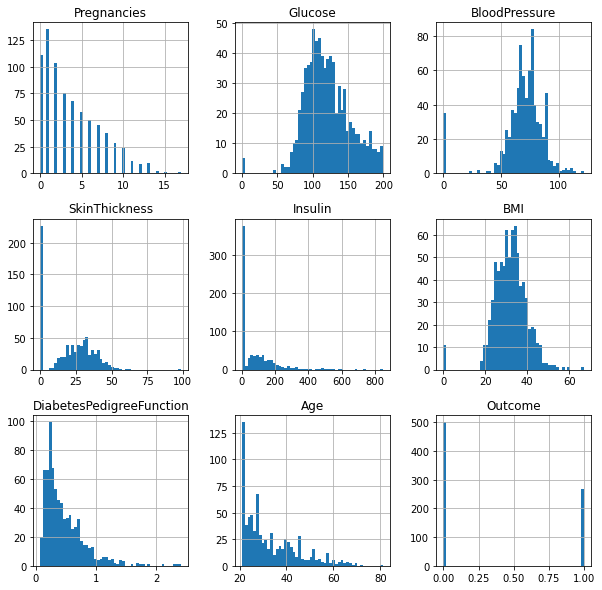

In [8]:
df.hist(bins=50 , figsize=(10,10));

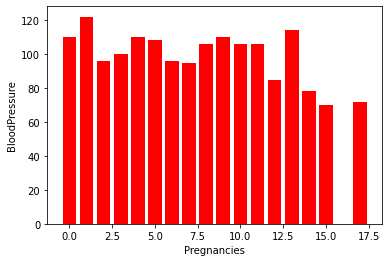

In [9]:
plt.bar(df['Pregnancies'], df['BloodPressure'], color='red')
plt.xlabel('Pregnancies')
plt.ylabel('BloodPressure')
plt.show()

In [10]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

#### 2.Extract data fromOutcome column is a variable named Y

In [11]:
y=df['Outcome']

In [12]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

#### 3.Extract data from every column except Outcome column in a variable named X.

In [13]:
x=df.drop(['Outcome'],axis=1)

In [14]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [15]:
# scale data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [16]:
x_scaled

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

#### 4.Divide the dataset into two parts for training and testing in 70% and 30% proportion

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=0)

#### 5.Create and train Random Forest Model on training set

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
model=RandomForestClassifier(min_samples_split=2, max_depth=40, max_features= 'sqrt',
                             min_samples_leaf=2, n_estimators=200,bootstrap=False)

In [21]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=40, max_features='sqrt',
                       min_samples_leaf=2, n_estimators=200)

#### 6.Make predictions based on the testing set using the trained model

In [22]:
predict=model.predict(X_test)

#### 7.Check the performance by calculating the confusion matrix and accuracy score of the model

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [24]:
accuracy_score(y_test, predict)

0.7792207792207793

In [25]:
confusion_matrix( y_test, predict)

array([[139,  18],
       [ 33,  41]], dtype=int64)

In [34]:
param_grid = {'n_estimators':[100,200,500,1000,5000],
              'max_features':['auto','sqrt'],
              'criterion': ['gini','entropy'],
              'max_depth': [10,20,30,40,50,None],
              'min_samples_split': [2,5,10,15,20],
              'min_samples_leaf': [1,2,4,10],
              'bootstrap': [True, False ]}

In [35]:
from sklearn.model_selection import RandomizedSearchCV

In [36]:
random_search=RandomizedSearchCV(estimator=model,param_distributions=param_grid, n_iter=10, cv=10)

In [37]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=10,
                   estimator=RandomForestClassifier(bootstrap=False,
                                                    max_depth=40,
                                                    max_features='sqrt',
                                                    min_samples_leaf=2,
                                                    n_estimators=200),
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, 30, 40, 50, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 10],
                                        'min_samples_split': [2, 5, 10, 15, 20],
                                        'n_estimators': [100, 200, 500, 1000,
                                                         5000]})

In [38]:
print('Best score for data1:', random_search.best_score_) 

Best score for data1: 0.756114605171209


In [39]:
# View the best parameters for the model found using grid search
print('Best min_samples_split:',random_search.best_estimator_.min_samples_split) 
print('Best max_depth:',random_search.best_estimator_.max_depth) 
print('Best max_features:',random_search.best_estimator_.max_features)
print('Best min_samples_leaf:',random_search.best_estimator_.min_samples_leaf)
print('Best n_estimators:',random_search.best_estimator_.n_estimators)
print('Best bootstrap:',random_search.best_estimator_.bootstrap)

Best min_samples_split: 10
Best max_depth: 40
Best max_features: sqrt
Best min_samples_leaf: 2
Best n_estimators: 200
Best bootstrap: True
